In [1]:
import os
import sys
import warnings
import pickle

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evolutionary_search import EvolutionaryAlgorithmSearchCV

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from functools import partial

from tests import train_test_split_intime, train_test_split_kfold
from tests import train_test_split_intime_smote, train_test_split_kfold_smote
from tests import train_test_split_intime_resample, train_test_split_kfold_resample
from tests import train_test_split_intime_adasyn, train_test_split_kfold_adasyn

from tests import test_intime, test_kfold
from tests import test_pdf_representation, test_intime_pdf_representation

#%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

Using TensorFlow backend.


In [2]:
df_train = pd.read_pickle('data_train.pkl')
df_test = pd.read_pickle('data_test.pkl')

In [3]:
target = ['discretize_s4', ]
predictors = [i for i in df_train.columns if i not in target]
score_function = roc_auc_score

In [4]:
from neuralnet import SimpleMLPGlauston2015

# Sem Oversamplig

### Teste básico com validação cruzada

(1100, 13)
Epoch 0, Minibatch Loss = 0.7476, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.6932, Training precission = 0.000
Epoch 200, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 300, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 400, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 500, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 600, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 700, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 800, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 900, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1000, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1100, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1200, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1300, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1400, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1500, Minibatch Loss

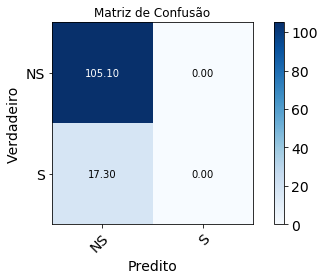

In [5]:
# simple Kfold cross validation
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold, 
           mlp, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

(1224, 13)
Epoch 0, Minibatch Loss = 0.7162, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.6932, Training precission = 0.000
Epoch 200, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 300, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 400, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 500, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 600, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 700, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 800, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 900, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1000, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1100, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1200, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1300, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1400, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1500, Minibatch Loss

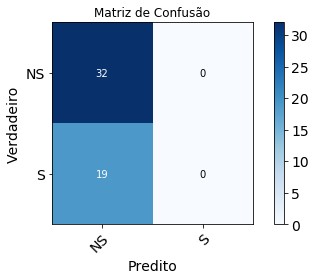

In [6]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_intime(df_train,
            df_test,
            train_test_split_intime,
            mlp,
            score_function,
            predictors,
            target)

# Oversampling Glauston

### Teste básico com validação cruzada

(1890, 13)
Epoch 0, Minibatch Loss = 0.6938, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.7027, Training precission = 0.600
Epoch 200, Minibatch Loss = 0.5060, Training precission = 0.875
Epoch 300, Minibatch Loss = 0.6046, Training precission = 0.800
Epoch 400, Minibatch Loss = 0.7784, Training precission = 0.556
Epoch 500, Minibatch Loss = 0.5356, Training precission = 1.000
Epoch 600, Minibatch Loss = 0.6403, Training precission = 0.750
Epoch 700, Minibatch Loss = 0.5956, Training precission = 1.000
Epoch 800, Minibatch Loss = 0.3515, Training precission = 1.000
Epoch 900, Minibatch Loss = 0.6793, Training precission = 0.667
Epoch 1000, Minibatch Loss = 0.5862, Training precission = 1.000
Epoch 1100, Minibatch Loss = 0.5772, Training precission = 0.833
Epoch 1200, Minibatch Loss = 0.5653, Training precission = 0.833
Epoch 1300, Minibatch Loss = 0.4652, Training precission = 1.000
Epoch 1400, Minibatch Loss = 0.6249, Training precission = 0.714
Epoch 1500, Minibatch Loss

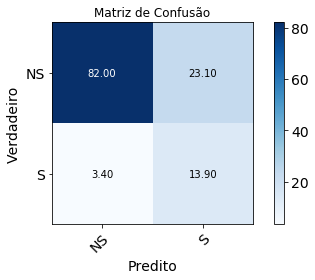

In [7]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold_resample, 
           mlp, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

(2102, 13)
Epoch 0, Minibatch Loss = 0.6652, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.5086, Training precission = 1.000
Epoch 200, Minibatch Loss = 1.0166, Training precission = 0.000
Epoch 300, Minibatch Loss = 0.3157, Training precission = 1.000
Epoch 400, Minibatch Loss = 0.3139, Training precission = 1.000
Epoch 500, Minibatch Loss = 0.5032, Training precission = 1.000
Epoch 600, Minibatch Loss = 0.5032, Training precission = 1.000
Epoch 700, Minibatch Loss = 0.5032, Training precission = 1.000
Epoch 800, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 900, Minibatch Loss = 0.3133, Training precission = 1.000
Epoch 1000, Minibatch Loss = 0.5122, Training precission = 1.000
Epoch 1100, Minibatch Loss = 0.5032, Training precission = 1.000
Epoch 1200, Minibatch Loss = 0.5344, Training precission = 1.000
Epoch 1300, Minibatch Loss = 0.6687, Training precission = 0.500
Epoch 1400, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 1500, Minibatch Loss

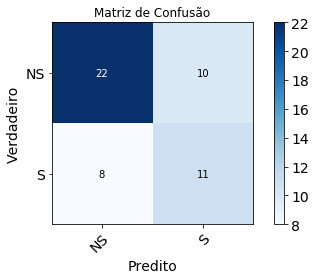

In [8]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_intime(df_train,
            df_test,
            train_test_split_intime_resample,
            mlp,
            score_function,
            predictors,
            target)

# Oversampling Smote

### Teste básico com validação cruzada

(1890, 13)
Epoch 0, Minibatch Loss = 0.7191, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.7040, Training precission = 0.571
Epoch 200, Minibatch Loss = 0.5687, Training precission = 0.778
Epoch 300, Minibatch Loss = 0.7181, Training precission = 0.500
Epoch 400, Minibatch Loss = 0.5147, Training precission = 1.000
Epoch 500, Minibatch Loss = 0.5558, Training precission = 0.857
Epoch 600, Minibatch Loss = 0.4965, Training precission = 1.000
Epoch 700, Minibatch Loss = 0.6146, Training precission = 0.800
Epoch 800, Minibatch Loss = 0.5643, Training precission = 0.778
Epoch 900, Minibatch Loss = 0.6412, Training precission = 0.750
Epoch 1000, Minibatch Loss = 0.6323, Training precission = 0.714
Epoch 1100, Minibatch Loss = 0.5673, Training precission = 0.833
Epoch 1200, Minibatch Loss = 0.6013, Training precission = 0.800
Epoch 1300, Minibatch Loss = 0.5055, Training precission = 1.000
Epoch 1400, Minibatch Loss = 0.4689, Training precission = 1.000
Epoch 1500, Minibatch Loss

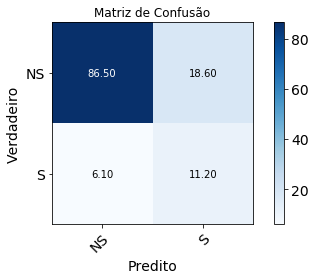

In [9]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold_smote,
           mlp, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

(2102, 13)
Epoch 0, Minibatch Loss = 0.6931, Training precission = 0.000
Epoch 100, Minibatch Loss = 1.1934, Training precission = 0.000
Epoch 200, Minibatch Loss = 0.8178, Training precission = 0.500
Epoch 300, Minibatch Loss = 0.3567, Training precission = 1.000
Epoch 400, Minibatch Loss = 0.7736, Training precission = 0.000
Epoch 500, Minibatch Loss = 1.3133, Training precission = 0.000
Epoch 600, Minibatch Loss = 0.9958, Training precission = 0.000
Epoch 700, Minibatch Loss = 0.5032, Training precission = 1.000
Epoch 800, Minibatch Loss = 0.3133, Training precission = 1.000
Epoch 900, Minibatch Loss = 0.7110, Training precission = 0.000
Epoch 1000, Minibatch Loss = 0.3143, Training precission = 1.000
Epoch 1100, Minibatch Loss = 0.8133, Training precission = 0.500
Epoch 1200, Minibatch Loss = 1.0025, Training precission = 0.000
Epoch 1300, Minibatch Loss = 0.6907, Training precission = 0.000
Epoch 1400, Minibatch Loss = 0.5303, Training precission = 1.000
Epoch 1500, Minibatch Loss

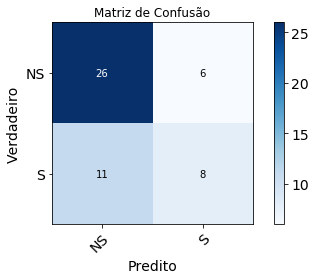

In [10]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_intime(df_train,
            df_test,
            train_test_split_intime_smote,
            mlp,
            score_function,
            predictors,
            target)

# Oversampling Adasyn

### Teste básico com validação cruzada

(1900, 13)
Epoch 0, Minibatch Loss = 0.6836, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.6149, Training precission = 0.714
Epoch 200, Minibatch Loss = 0.5285, Training precission = 0.917
Epoch 300, Minibatch Loss = 0.5697, Training precission = 0.833
Epoch 400, Minibatch Loss = 0.4841, Training precission = 0.842
Epoch 500, Minibatch Loss = 0.5604, Training precission = 0.846
Epoch 600, Minibatch Loss = 0.5543, Training precission = 0.833
Epoch 700, Minibatch Loss = 0.5510, Training precission = 1.000
Epoch 800, Minibatch Loss = 0.6635, Training precission = 0.667
Epoch 900, Minibatch Loss = 0.6332, Training precission = 0.778
Epoch 1000, Minibatch Loss = 0.5374, Training precission = 1.000
Epoch 1100, Minibatch Loss = 0.6949, Training precission = 0.615
Epoch 1200, Minibatch Loss = 0.7754, Training precission = 0.500
Epoch 1300, Minibatch Loss = 0.6482, Training precission = 0.692
Epoch 1400, Minibatch Loss = 0.6113, Training precission = 0.778
Epoch 1500, Minibatch Loss

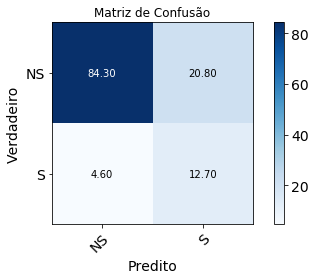

In [11]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)

test_kfold(df_train, 
           df_test, 
           train_test_split_kfold_adasyn, 
           mlp, score_function, 
           predictors, 
           target)

### Teste básico com separação no tempo

(2112, 13)
Epoch 0, Minibatch Loss = 0.7277, Training precission = 0.000
Epoch 100, Minibatch Loss = 0.6490, Training precission = 0.667
Epoch 200, Minibatch Loss = 0.5736, Training precission = 0.778
Epoch 300, Minibatch Loss = 0.7292, Training precission = 0.571
Epoch 400, Minibatch Loss = 0.5374, Training precission = 0.875
Epoch 500, Minibatch Loss = 0.6407, Training precission = 0.667
Epoch 600, Minibatch Loss = 0.4185, Training precission = 1.000
Epoch 700, Minibatch Loss = 0.5556, Training precission = 0.857
Epoch 800, Minibatch Loss = 0.5962, Training precission = 0.750
Epoch 900, Minibatch Loss = 0.5785, Training precission = 0.833
Epoch 1000, Minibatch Loss = 0.4201, Training precission = 1.000
Epoch 1100, Minibatch Loss = 0.5975, Training precission = 1.000
Epoch 1200, Minibatch Loss = 0.6699, Training precission = 0.667
Epoch 1300, Minibatch Loss = 0.7450, Training precission = 0.556
Epoch 1400, Minibatch Loss = 0.4092, Training precission = 1.000
Epoch 1500, Minibatch Loss

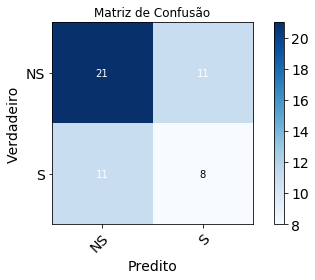

In [12]:
mlp = SimpleMLPGlauston2015(batch_size=20,
                            n_epoches=2000,
                            learning_rate=0.01)
test_intime(df_train,
            df_test,
            train_test_split_intime_adasyn,
            mlp,
            score_function,
            predictors,
            target)